Stand: 27.04.2021

| ![Kohlendioxidmessung der Messstation Wasserkuppe](/images/kohlendioxidmessung/kohlendioxidmessung_messstation_wasserkuppe.png) | 
|:--:| 
| *Kohlendioxidmessung der Messstation Wasserkuppe* |

Der Boden als Kohlenstoffspeicher ist keine Konstante, sondern reagiert äußerst dynamisch auf veränderte Konzentrationen von Treibhausgasen in der Atmosphäre. Darum ist es wichtig den Kohlendioxidgehalt zu verfolgen. Das Hessische Landesamt für Naturschutz, Umwelt und Geologie, liefert aktuelle Messwerte der Kohlendioxid-Konzentrationen von zwei Stationen in Hessen. Diese befinden sich in Linden und Wasserkuppe.[^1] 

Für die Jahre 2001-2018, siehe obige Abbildung, wurden die Daten nach Monat gruppiert. Jedes Element 
der Matrix stellt den monatlichen Mittelwert der Kohlendioxidmessung der Messstation Wasserkuppe dar. 
Die Angaben als Massenkonzentrationen in $mg/m^3$ gelten nur für die bestimmten Bedingungen von Druck und Temperatur. Daten als Volumenmischungsverhältnisse in ppm sind unabhängig von Druck und Temperatur. [^2]

In der Abbildung erkennt man den Photosyntheseeffekt der Vegetation. In den Wintermonaten ist der Kohlendioxidgehalt der Atmosphäre  höher, da eine Assimilation kaum vorhanden ist. Bei der Assimilation werden aufgenommene, fremde anorganische und organische Stoffe aus der Umwelt in Bestandteile des Organismus umgewandelt, meistens unter Energiezufuhr. Ein Beispiel dafür ist die Bildung von Glucose.

$$6 H_2O + 6 CO_2 → C_6 H_{12} O_6 + 6 O_2$$

Durch die Photosynthese von Landpflanzen werden in den weiteren Monaten Kohlendioxid entzogen, dies kann man gut in den Monaten von Mai bis September erkennen, dort ist die Kohlendioxidmessung am geringsten. 

Der Mittelwert ist von 2001-2004 konstant und ab 2005 gestiegen. Bedingt durch umfangreiche anthropogene Freisetzung wird der natürliche Treibhauseffekt verstärkt, welches eine Klimaänderung zur Folge hat.


# Der Datensatz

Der Datensatz stammt vom Hessisches Landesamt für Naturschutz, Umwelt und Geologie (HLNUG). Dieser wurde von folgender Webseite runtergeladen. http://www.hlnug.de/messwerte/datenportal/messstelle/2/1/0801/7,11,20

Folgendes wurde gewählt: Luft, Luftmessnetz, Wasserkuppe. Mit den drei ausgewählten Parametern Kohlendioxid (CO₂), Luftdruck, Temperatur und dem Stundenmittelwert. Temperatur und Luftdruck sind notwendig um die Messwerte in das Volumenmischungsverhältnis ppm umzurechnen. Der Download fand am 05.06.2020 statt, für diesem Zeitraum: 05.07.2000 - 04.06.2020. 


| ![Standort der Messstation Wasserkuppe](/images/kohlendioxidmessung/standort_der_messstation_wasserkuppe.png) | 
|:--:| 
| *Standort der Messstation Wasserkuppe* |



# Messstellenstandort Wasserkuppe mit Geopandas

Welchen Einfluss hat der Messstellenstandort Wasserkuppe auf die Messdaten? Vor allem die anthropogen Einflüsse der näheren Umgebung. Die Visualisierung wird mit geopandas umgesetzt. Geopandas ist eine Pythonbibliothek für die Arbeit mit Geodaten. Für eine visuelle Eingrenzung liefert eine Shapefile, ein Format für vektorielle Geodaten, Polygondaten mit Bundesländer und Postleitzahlengebiete. Im weiteren Verlauf wird der Umgang mit dem Koordinatenbezugssystem beschrieben, den Installationsblauf von Geopandas gezeigt und eine OpenStreetMap als Basiskarte eingebunden.

Das Koordinatenreferenzsystem oder Koordinatenbezugsystem (KBS), engl. coordinate reference system, international mit CRS abgekürzt, beschreibt die Lage eines Koordinatensystems zur Angabe einer Position auf der Erde.



## EPSG-Codes
Der EPSG-Code ist ein System weltweit eindeutiger, 4- bis 5-stelliger Schlüsselnummern für Koordinatenreferenzsysteme und andere geodätische Datensätze, wie Referenzellipsoide oder Projektionen.


  	

 	 	 

 	



|Code   |Koordinatenreferenzsystem   |Bemerkung   |
|:-:|:-:|:-:|
|4326|WGS-84 / Geographische Koordinaten|weltweites System für GPS-Geräte, OpenStreetMap Datenbank|
|3857|WGS 84 / Pseudo-Mercator|Google Maps, OpenStreetMap|
|31467|DHDN / Gauß-Krüger Zone 3|passend für Baden-Württemberg und Hessen.|
|   |   |   |

## Installation

Es wurde Python 3.7 genutzt. Die folgende Installationsreihenfolge ist wichtig. Microsoft Visual C++ 14.0 oder höher wird benötigt. Dieses kann unter https://visualstudio.microsoft.com/de/visual-cpp-build-tools/ runtergeladen werden.

* pip install numpy
* pip install pandas
* pip install shapely
* pip install pipwin 
* pipwin install gdal
* pipwin install fiona
* pip install pyproj
* pip install six
* pip install rtree
* pip install geopandas

* pip install matplotlib
* pip contextily ---> lieferte den Fehler: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.

Deswegen:
* conda install contextily --channel conda-forge

## Shapefile Deutschland

Die benötigte Shapefile wurde von folgender Seite runtergeladen:
www.suche-postleitzahl.org/downloads. Die folgende Seite war dabei sehr hilfreich.[^9]


- plz-gebiete.shp: Die Datei enthält die Polygone der einzelnen Postleitzahlenbereiche 
- zuordnung_plz_ort.csv: Die zugehörige Postleitzahl als Bezeichner für Ort und Bundesland. Das Dateiformat ist im CSV-Format. 


    

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

Die Postleitzahlen müssen als String gelesen werden. Sonst wird eine 01 beginnende PLZ mit 1 geparst. Die shapefile wird geladen und das CRS ausgegeben. Alle vier Dateien mit den Endungen, .dbf , prj , shp , shx sollten im selben Ordner sein. 

In [2]:
dtl_shapefile_df = gpd.read_file('plz-gebiete.shp', dtype={'plz': str}, encoding="utf-8")

dtl_shapefile_df



plz                             note  \
0     52538          52538 Gangelt, Selfkant   
1     47559                 47559 Kranenburg   
2     52525      52525 Waldfeucht, Heinsberg   
3     52074                     52074 Aachen   
4     52531            52531 Übach-Palenberg   
...     ...                              ...   
8720  02899  02899 Ostritz, Schönau-Berzdorf   
8721  02929            02929 Rothenburg/O.L.   
8722  02827                    02827 Görlitz   
8723  02828                    02828 Görlitz   
8724  02826                    02826 Görlitz   

                                               geometry  
0     POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...  
1     POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...  
2     POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...  
3     POLYGON ((5.97486 50.79804, 5.97495 50.79809, ...  
4     POLYGON ((6.01507 50.94788, 6.03854 50.93561, ...  
...                                                 ...  
8720  POLYGON ((14.85296 51.06854, 14.85449 51.06859...  
8721  POLYGON ((14.85491 51.32895, 14.85608 51.33004...  
8722  POLYGON ((14.91168 51.14243, 14.91571 51.14571...  
8723  POLYGON ((14.93413 51.16084, 14.93451 51.16123...  
8724  POLYGON ((14.95374 51.14703, 14.95393 51.14814...  

[8725 rows x 3 columns]

In [3]:
dtl_shapefile_df.crs

{'init': 'epsg:4326'}

In [4]:
plz_ort_df = pd.read_csv(
    'zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_ort_df.drop('osm_id', axis=1, inplace=True)

plz_ort_df.head()

ort    plz           bundesland
0    Aach  78267    Baden-Württemberg
1    Aach  54298      Rheinland-Pfalz
2  Aachen  52062  Nordrhein-Westfalen
3  Aachen  52064  Nordrhein-Westfalen
4  Aachen  52066  Nordrhein-Westfalen

Verbinde die .shape-Datei mit der csv-Datei, nutze dabei die Postleitzahlen. Dies ist ein typischer Excel sverweis. 

In [5]:
deutschland_df = pd.merge(
    left=dtl_shapefile_df, 
    right=plz_ort_df, 
    on='plz',
    how='inner'
)

deutschland_df.drop(['note'], axis=1, inplace=True)

deutschland_df.head()

plz                                           geometry         ort  \
0  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...     Gangelt   
1  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...    Selfkant   
2  47559  POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...  Kranenburg   
3  52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...   Heinsberg   
4  52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...  Waldfeucht   

            bundesland  
0  Nordrhein-Westfalen  
1  Nordrhein-Westfalen  
2  Nordrhein-Westfalen  
3  Nordrhein-Westfalen  
4  Nordrhein-Westfalen

# Messstellenstandort Wasserkuppe 

In [6]:
import shapely
import contextily as ctx

          city                         geometry
0  Wasserkuppe  POINT (1106053.829 6532916.278)


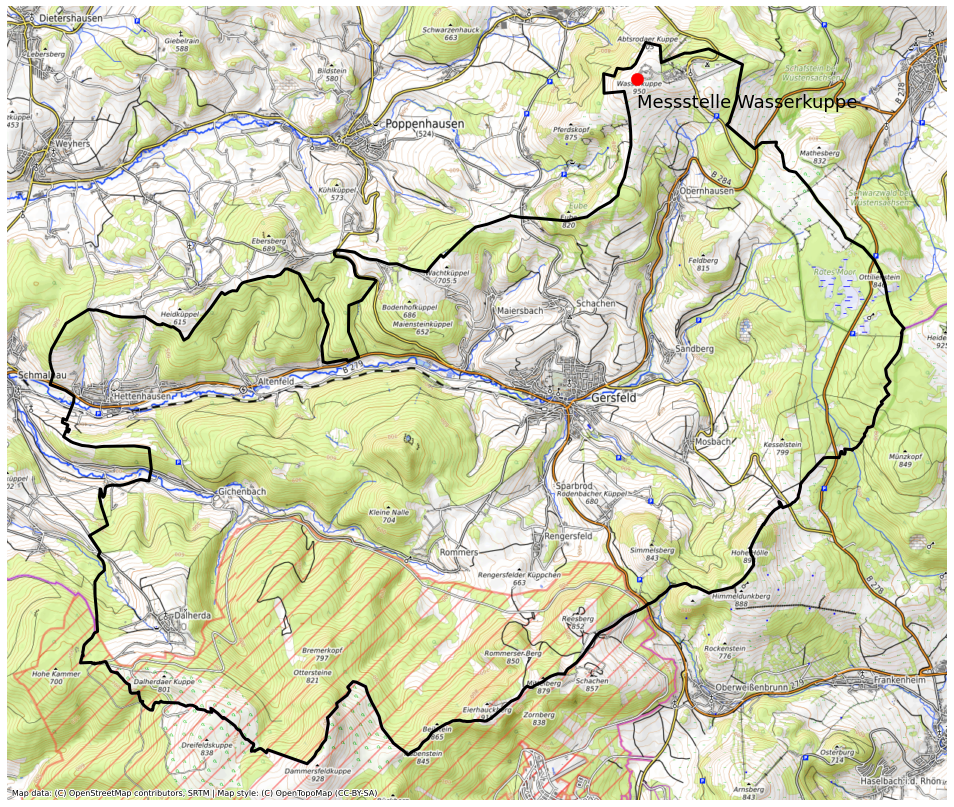

In [8]:
wasserkuppe_df = deutschland_df.query(('plz == "36129"'))
wasserkuppe_df = wasserkuppe_df.to_crs(epsg=3857)

df = pd.DataFrame({'city': ['Wasserkuppe'],
                   'latitude': [50.49768412],
                   'longitude': [9.9358506]})
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                       crs = {'init': 'epsg:4326'},
                       geometry = [shapely.geometry.Point(xy)
                                 for xy in zip(df.longitude, df.latitude)])
gdf = gdf.to_crs(epsg = 3857)
print(gdf)
fig = plt.figure(figsize = (15,15))
ax = plt.subplot()
ax.text(x = 1106053.829, y = 6532916.278 - 715, s ='Messstelle Wasserkuppe', size = 18) 
wasserkuppe_df = wasserkuppe_df.plot(color='none',edgecolor='black', linewidth=3, ax = ax)
                                                                         
ax.set_axis_off()                                    

gdf.plot(ax = wasserkuppe_df, marker = 'o', color = 'red', markersize = 150)

ctx.add_basemap(ax = ax, source=ctx.providers.OpenTopoMap)

Der rote schraffierte Bereich ist das Sperrgebiet Truppenübungsplatz Wildflecken.

# Einfluss des Messstellenstandort auf die Messdaten

Die Lichter der Erde bei Nacht sind hauptsächlich vom Menschen gemacht. Dieses wird genutzt um die nährere Umgebung des Standortes auf die anthropogenen Einflüsse einzuschätzen. Hierfür werden Satellitenbilder genutzt. Vom Visible-Infrared-Imaging-Radiometer-Suite-Instrument (VIIRS) auf dem Suomi-NPP-Satelliten, der am 28. Oktober 2011 von NASA und NOAA (National Oceanic and Atmospheric Administration) gestartet worden ist.

Das VIIRS-Instrument wurde speziell entwickelt, um die Erde tagsüber statt nachts zu beobachten. Seine Empfindlichkeit reicht aus, um das Licht eines einzelnen Schiffes auf der Erdoberfläche zu erfassen.[^4]



          city                         geometry
0  Wasserkuppe  POINT (1106053.829 6532916.278)


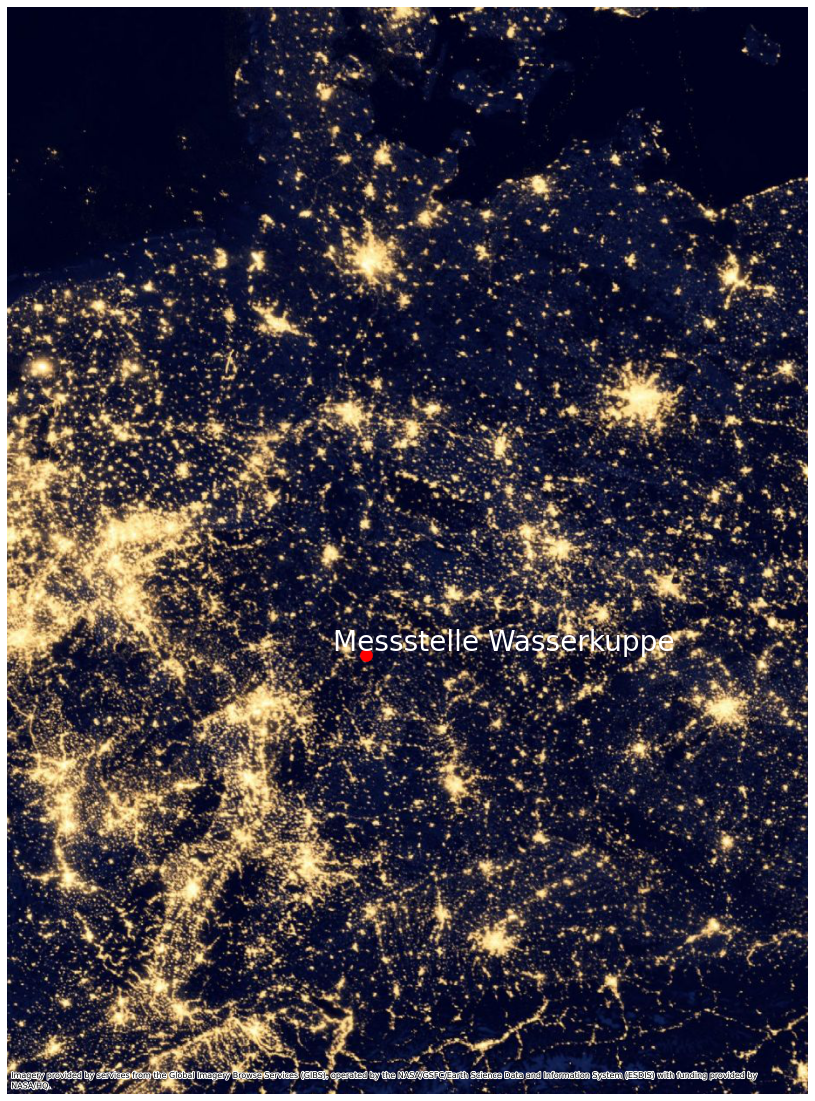

In [13]:
wasserkuppe_df = deutschland_df
wasserkuppe_df = wasserkuppe_df.to_crs(epsg=3857)

df = pd.DataFrame({'city': ['Wasserkuppe'],
                   'latitude': [50.49768412],
                   'longitude': [9.9358506]})
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                       crs = {'init': 'epsg:4326'},
                       geometry = [shapely.geometry.Point(xy)
                                 for xy in zip(df.longitude, df.latitude)])
gdf = gdf.to_crs(epsg = 3857)
print(gdf)
fig = plt.figure(figsize = (20,20))
ax = plt.subplot()
ax.text(x = 1106053.829 - 47150, y = 6532916.278 + 5915, s ='Messstelle Wasserkuppe', size = 28, color = 'white') 
wasserkuppe_df = wasserkuppe_df.plot(color='none',edgecolor='gray', linewidth=0, ax = ax)
                                                                         
ax.set_axis_off()                                    

gdf.plot(ax = wasserkuppe_df, marker = 'o', color = 'red', markersize = 150)

ctx.add_basemap(ax = ax, source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012)

          city                         geometry
0  Wasserkuppe  POINT (1106053.829 6532916.278)


C:\Users\mm\anaconda3\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 9 is not valid for the current tile provider (valid zooms: 1 - 8).
  warnings.warn(msg)


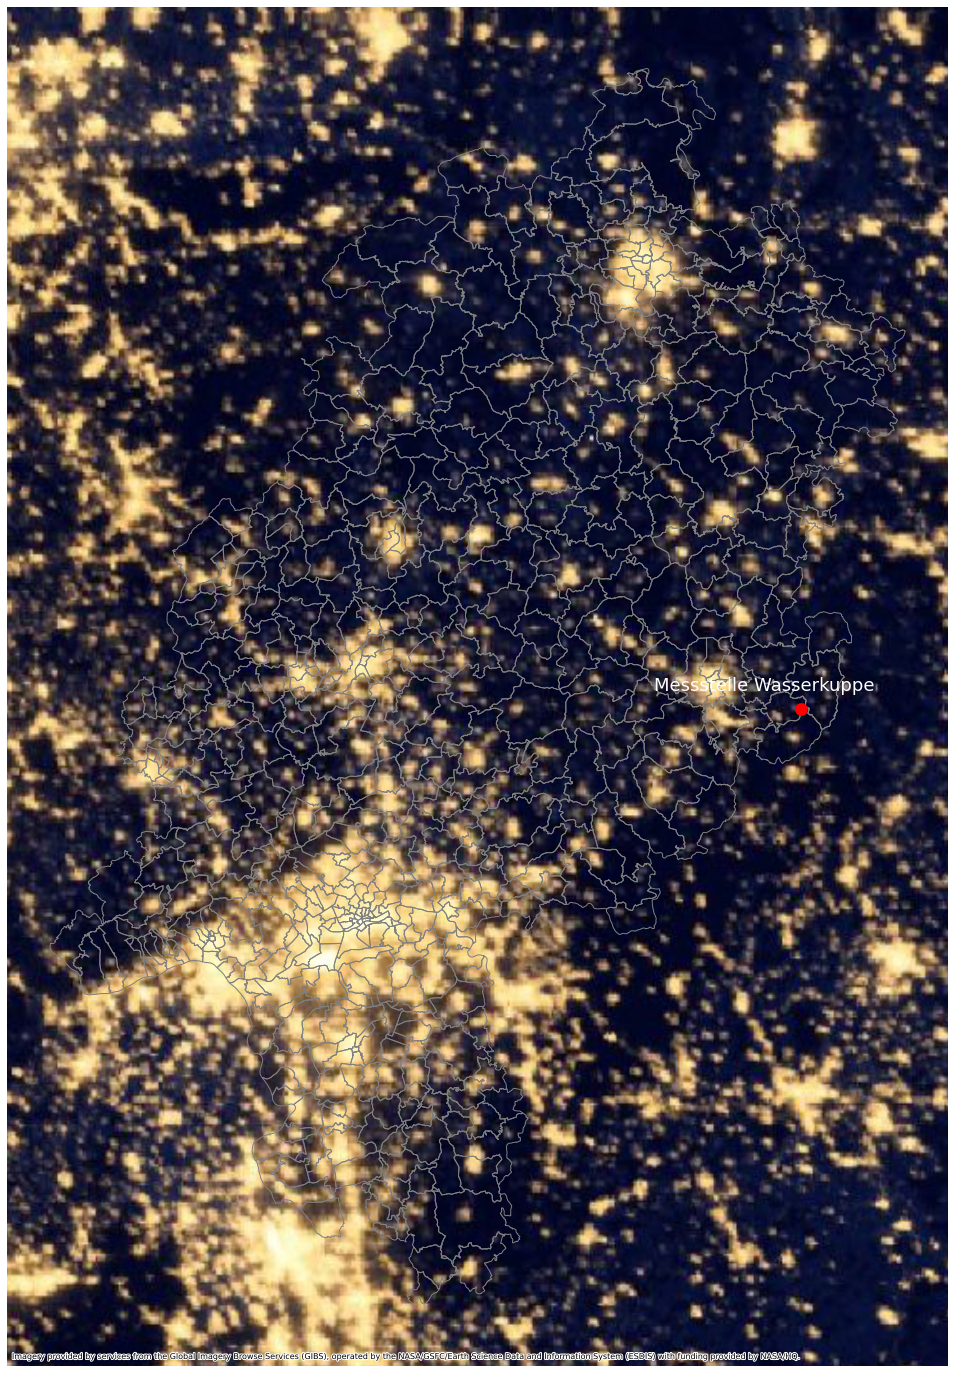

In [17]:
wasserkuppe_df = deutschland_df.query(('bundesland == "Hessen"'))
wasserkuppe_df = wasserkuppe_df.to_crs(epsg=3857)

df = pd.DataFrame({'city': ['Wasserkuppe'],
                   'latitude': [50.49768412],
                   'longitude': [9.9358506]})
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                       crs = {'init': 'epsg:4326'},
                       geometry = [shapely.geometry.Point(xy)
                                 for xy in zip(df.longitude, df.latitude)])
gdf = gdf.to_crs(epsg = 3857)
print(gdf)
fig = plt.figure(figsize = (25,25))
ax = plt.subplot()
ax.text(x = 1106053.829 - 47150, y = 6532916.278 + 5915, s ='Messstelle Wasserkuppe', size = 18, color = 'white') 
wasserkuppe_df = wasserkuppe_df.plot(color='none',edgecolor='gray', linewidth=1, ax = ax)
                                                                         
ax.set_axis_off()                                    

gdf.plot(ax = wasserkuppe_df, marker = 'o', color = 'red', markersize = 150)

ctx.add_basemap(ax = ax, source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012)

          city                         geometry
0  Wasserkuppe  POINT (1106053.829 6532916.278)


C:\Users\mm\anaconda3\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 13 is not valid for the current tile provider (valid zooms: 1 - 8).
  warnings.warn(msg)


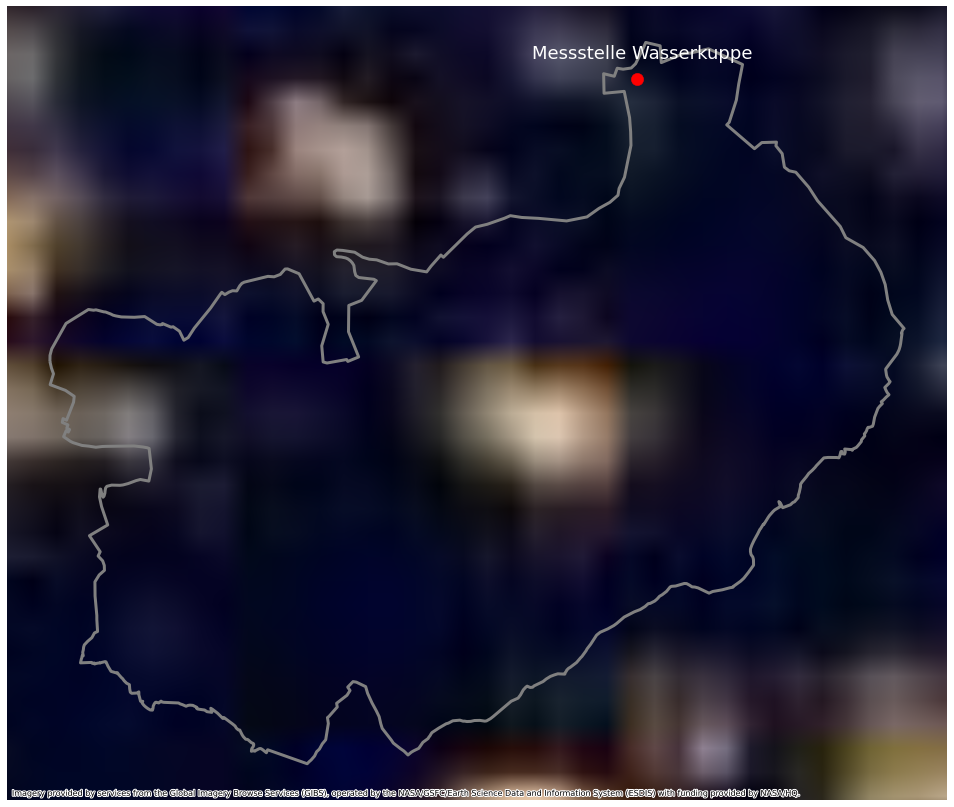

In [28]:
wasserkuppe_df = deutschland_df.query(('plz == "36129"'))
wasserkuppe_df = wasserkuppe_df.to_crs(epsg=3857)

df = pd.DataFrame({'city': ['Wasserkuppe'],
                   'latitude': [50.49768412],
                   'longitude': [9.9358506]})
gdf = gpd.GeoDataFrame(df.drop(['latitude', 'longitude'], axis=1),
                       crs = {'init': 'epsg:4326'},
                       geometry = [shapely.geometry.Point(xy)
                                 for xy in zip(df.longitude, df.latitude)])
gdf = gdf.to_crs(epsg = 3857)
print(gdf)
fig = plt.figure(figsize = (15,15))
ax = plt.subplot()
ax.text(x = 1106053.829 - 2700, y = 6532916.278 + 515, s ='Messstelle Wasserkuppe', size = 18, color = 'white') 
wasserkuppe_df = wasserkuppe_df.plot(color='none',edgecolor='gray', linewidth=3, ax = ax)
                                                                         
ax.set_axis_off()                                    

gdf.plot(ax = wasserkuppe_df, marker = 'o', color = 'red', markersize = 150)

ctx.add_basemap(ax = ax, source=ctx.providers.NASAGIBS.ViirsEarthAtNight2012)

Die verschiedenen Zoomlevel um die Region der Messstelle zeigen wenige Lichter bei Nacht. Hier kann man eine ländliche Region erkennen. Das bedeutet der Datensatz sollte geringe anthropogen Einflüsse der näheren Umgebung haben. 

# Verarbeitung und Vorverarbeitung vom Datensatz

In diesem Abschnitt wird der Datensatz bearbeitet. Die Daten befinden sich noch im Rohzustand, für eine weitere Verarbeitung, werden sie in bestimmte Formate umgewandelt. Anschließend analysieren wir die Messdaten mit Python. Für die Umsetzung wird das Pandas Framework genutzt. Hauptbestandteil ist die Klasse DataFrame, mit der sich zweidimensionale Tabellen, die aus Zeilen und Spalten bestehen, aufbereiten und umarbeiten lassen. Die Datei messwerte.txt liefert Hinweise, wie die Datei in Python geladen werden soll. Deutschland verwendet ein Komma (,) als Dezimaltrennzeichen. Die meisten europäischen Länder, trennen mit ‚;“ anstatt ‚,‘ und das Dezimaltrennzeichen ist ‚,‘ statt ‚.‘ 

Datum;Zeit;Kohlendioxid (CO2)[mg/m³];Temperatur[°C];Luftdruck[hPa]

01.12.2019;01:00;867;-3,5;1023

01.12.2019;02:00;885;-3,6;1023

Die Rohdaten stellen folgenden Aufgaben:

Der Datentyp muss von Objekt in Zahl umwgewandelt werden. 
Die Datumspalte und Zeitspalte in ein Datumsformat bringen („%d-%m-%y %H:%M“).

Die pandas Bibliothek wird geladen und mit mit pd abgekürzt.

In [11]:
import pandas as pd

Die Messdaten einlesen (pd.read_csv) und die Zellen mit ‚;‘ trennen. Dezimaltrennzeichen ‚,‘ ( sep=‘;‘ , decimal=‘,‘).

In [12]:
df_wasserkuppe = pd.read_csv('daten/messwerte_wasserkuppe.txt', sep = ';' , decimal = ',')

Die head-Methode liefert eine Übersicht über die ersten fünf Zeilen.

In [13]:
df_wasserkuppe.head()

Datum   Zeit Kohlendioxid (CO2)[mg/m³] Temperatur[°C] Luftdruck[hPa]  \
0  05.07.2000  01:00                         -            9,7              -   
1  05.07.2000  02:00                         -            9,8              -   
2  05.07.2000  03:00                         -            9,7              -   
3  05.07.2000  04:00                         -            9,4              -   
4  05.07.2000  05:00                         -            8,8              -   

  Windgeschwindigkeit[m/s] Windrichtung[Grad] Niederschlag[mm/30min]  \
0                     12,6                  -                      -   
1                     10,8                  -                      -   
2                     11,0                  -                      -   
3                     12,8                  -                      -   
4                     12,6                  -                      -   

  Globalstrahlung[W/m²]  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1

Beim Einlesen von Daten versucht Pandas, die Daten automatisch in ein Zahlenformat (Integer oder Floats) zu konvertieren. Mit df.dtypes erhalten wir den entsprechenden Datentyp. Für die Messparameter und das Datum ist das nicht gelungen. Für die Verarbeitungsschritte, die uns noch bevorstehen, ist dieses Format ungeeignet.

In [14]:
df_wasserkuppe.dtypes

Datum                        object
Zeit                         object
Kohlendioxid (CO2)[mg/m³]    object
Temperatur[°C]               object
Luftdruck[hPa]               object
Windgeschwindigkeit[m/s]     object
Windrichtung[Grad]           object
Niederschlag[mm/30min]       object
Globalstrahlung[W/m²]        object
dtype: object

Die Dezimaltrennzeichen in Spalte Temperatur[°C] ',' mit '.' tauschen und erstelle eine neue Spalte Temperatur (df['Temperatur']). (x.replace)

In [15]:
df_wasserkuppe['Temperatur'] = [x.replace(',' , '.') for x in df_wasserkuppe['Temperatur[°C]']]

In [16]:
df_wasserkuppe.head()

Datum   Zeit Kohlendioxid (CO2)[mg/m³] Temperatur[°C] Luftdruck[hPa]  \
0  05.07.2000  01:00                         -            9,7              -   
1  05.07.2000  02:00                         -            9,8              -   
2  05.07.2000  03:00                         -            9,7              -   
3  05.07.2000  04:00                         -            9,4              -   
4  05.07.2000  05:00                         -            8,8              -   

  Windgeschwindigkeit[m/s] Windrichtung[Grad] Niederschlag[mm/30min]  \
0                     12,6                  -                      -   
1                     10,8                  -                      -   
2                     11,0                  -                      -   
3                     12,8                  -                      -   
4                     12,6                  -                      -   

  Globalstrahlung[W/m²] Temperatur  
0                     1        9.7  
1                     1        9.8  
2                     1        9.7  
3                     1        9.4  
4                     1        8.8

Die Datenreihe Luftdruck[hPa], Temperatur und Kohlendioxid (CO2)[mg/m³] von object zu float umwandeln, und erstelle eine neue Spalten namens Luftdruck, Temperatur und Kohlendioxid. (pd.to_numeric) Der Parameter errors='coerce' wandelt '-' und andere Parsingfehler zu NaN (Not a Number) um.

Pandas-Operationen wie to_numeric arbeiten standardmäßig nicht "in-place". Deswegen werden die Ergebnisse, einer neuen Spalte zugewiesen.


In [17]:
df_wasserkuppe['Luftdruck'] = pd.to_numeric(df_wasserkuppe['Luftdruck[hPa]'], errors = 'coerce')

df_wasserkuppe['Temperatur'] = pd.to_numeric(df_wasserkuppe['Temperatur'], errors = 'coerce')

df_wasserkuppe['Kohlendioxid'] = pd.to_numeric(df_wasserkuppe['Kohlendioxid (CO2)[mg/m³]'], errors = 'coerce')

In [18]:
df_wasserkuppe.head()

Datum   Zeit Kohlendioxid (CO2)[mg/m³] Temperatur[°C] Luftdruck[hPa]  \
0  05.07.2000  01:00                         -            9,7              -   
1  05.07.2000  02:00                         -            9,8              -   
2  05.07.2000  03:00                         -            9,7              -   
3  05.07.2000  04:00                         -            9,4              -   
4  05.07.2000  05:00                         -            8,8              -   

  Windgeschwindigkeit[m/s] Windrichtung[Grad] Niederschlag[mm/30min]  \
0                     12,6                  -                      -   
1                     10,8                  -                      -   
2                     11,0                  -                      -   
3                     12,8                  -                      -   
4                     12,6                  -                      -   

  Globalstrahlung[W/m²]  Temperatur  Luftdruck  Kohlendioxid  
0                     1         9.7        NaN           NaN  
1                     1         9.8        NaN           NaN  
2                     1         9.7        NaN           NaN  
3                     1         9.4        NaN           NaN  
4                     1         8.8        NaN           NaN

In [19]:
df_wasserkuppe.tail()

Datum   Zeit Kohlendioxid (CO2)[mg/m³] Temperatur[°C]  \
174595  04.06.2020  20:00                       735            8,8   
174596  04.06.2020  21:00                       737            8,8   
174597  04.06.2020  22:00                       739            8,8   
174598  04.06.2020  23:00                       740            7,6   
174599  04.06.2020  24:00                       737            6,5   

       Luftdruck[hPa] Windgeschwindigkeit[m/s] Windrichtung[Grad]  \
174595            994                      4,9                  -   
174596            995                      5,4                  -   
174597            995                      5,9                  -   
174598            995                      7,4                  -   
174599            995                      6,6                  -   

       Niederschlag[mm/30min] Globalstrahlung[W/m²]  Temperatur  Luftdruck  \
174595                    0,0                    18         8.8      994.0   
174596                      -                     3         8.8      995.0   
174597                    0,4                     1         8.8      995.0   
174598                    0,2                     1         7.6      995.0   
174599                    0,0                     1         6.5      995.0   

        Kohlendioxid  
174595         735.0  
174596         737.0  
174597         739.0  
174598         740.0  
174599         737.0

In [20]:
df_wasserkuppe.dtypes

Datum                         object
Zeit                          object
Kohlendioxid (CO2)[mg/m³]     object
Temperatur[°C]                object
Luftdruck[hPa]                object
Windgeschwindigkeit[m/s]      object
Windrichtung[Grad]            object
Niederschlag[mm/30min]        object
Globalstrahlung[W/m²]         object
Temperatur                   float64
Luftdruck                    float64
Kohlendioxid                 float64
dtype: object

Für die weitere Datenverarbeitung, zum Beispiel für FP Prophet, wird ein bestimmtes Datumsformat benötigt. 
Zur 'Zeit'spalte wird ":00" hinzugeügt, ohne Sekundenformat gibt es eine Fehlermeldung. [^3]

Prophet ist eine Open-Source-Software, die vom Core Data Science-Team von Facebook veröffentlicht wurde. 
Prophet ist für die Prognose von Zeitreihendaten geeignet.


In [21]:
df_wasserkuppe['Sekundenformat'] = df_wasserkuppe['Zeit'] + ':00'

Die Pandas-Funktion to_datetime wird genutzt, um datumsspezifische Operationen durchführen zu können.

In [22]:
df_wasserkuppe['DatumYDM'] = pd.to_datetime(df_wasserkuppe.Datum)

Pandas wird informiert, dass die zu lesenden Werte nacheinander Angaben zum Tag, Monat, Jahr beinhalten.

In [23]:
df_wasserkuppe["DatumMDY"] = df_wasserkuppe["DatumYDM"].dt.strftime("%d-%m-%y")

Die Spalte Sekundenformat in 0 Tage 01:00:00 wird umgewandelt. (zählt Stunden bis 24 und beginnt bei 0 Tage)

In [24]:
df_wasserkuppe['Stundenzaehler'] = pd.to_timedelta(df_wasserkuppe.Sekundenformat)

Zur Spalte DatumMDY die Spalte Stundenzaehler addiert = 2019-12-01 01:00:00

In [25]:
df_wasserkuppe['DatumStundenzaehler'] = pd.to_datetime(df_wasserkuppe.DatumMDY) + pd.to_timedelta(df_wasserkuppe.Stundenzaehler)

Das Datumsformat wird in 01-12-2019 01:00 umgwandelt

In [26]:
df_wasserkuppe["DatumFinal"] = df_wasserkuppe["DatumStundenzaehler"].dt.strftime("%d-%m-%y %H:%M")

Die folgenden Spalten werden gelöscht:

In [27]:
df_wasserkuppe = df_wasserkuppe.drop(columns = ['Datum', 'Zeit','Sekundenformat','Kohlendioxid (CO2)[mg/m³]','Temperatur[°C]','Luftdruck[hPa]','DatumYDM','DatumMDY','Stundenzaehler','DatumStundenzaehler'])
df_wasserkuppe = df_wasserkuppe.drop(columns=['Windgeschwindigkeit[m/s]', 'Windrichtung[Grad]','Niederschlag[mm/30min]','Globalstrahlung[W/m²]'])

Die Spalte DatumFinal in Datum umbenennen.

In [28]:
df_wasserkuppe = df_wasserkuppe.rename(columns={'DatumFinal' : 'Datum'})

Die Spalte Datum als Index setzen, dadurch werden die Vorzüge der Datumsklasse genutzt.

In [29]:
df_wasserkuppe = df_wasserkuppe.set_index('Datum')

Das Ergebnis: Das Datum wurde als nutzbares Datumsformat umgewandelt. Die Temperatur, Luftdruck und Kohlendioxid sind im Zahlenformat und NaN Werte für fehlende Daten.

In [30]:
df_wasserkuppe.head()

Temperatur  Luftdruck  Kohlendioxid
Datum                                              
05-07-00 01:00         9.7        NaN           NaN
05-07-00 02:00         9.8        NaN           NaN
05-07-00 03:00         9.7        NaN           NaN
05-07-00 04:00         9.4        NaN           NaN
05-07-00 05:00         8.8        NaN           NaN

In [31]:
df_wasserkuppe.dtypes

Temperatur      float64
Luftdruck       float64
Kohlendioxid    float64
dtype: object

In [6]:
df_wasserkuppe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 174600 entries, 2000-05-07 01:00:00 to 2020-05-06 00:00:00
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Datum         174600 non-null  object 
 1   Temperatur    173564 non-null  float64
 2   Luftdruck     76646 non-null   float64
 3   Kohlendioxid  154136 non-null  float64
dtypes: float64(3), object(1)
memory usage: 6.7+ MB


Zusammenfassung:

In [ ]:
df_wasserkuppe['Temperatur'] = [x.replace(',', '.') for x in df_wasserkuppe['Temperatur[°C]']]
df_wasserkuppe['Luftdruck'] = pd.to_numeric(df_wasserkuppe['Luftdruck[hPa]'], errors='coerce')
df_wasserkuppe['Temperatur'] = pd.to_numeric(df_wasserkuppe['Temperatur'], errors='coerce')
df_wasserkuppe['Kohlendioxid'] = pd.to_numeric(df_wasserkuppe['Kohlendioxid (CO2)[mg/m³]'], errors='coerce')
df_wasserkuppe['Sekundenformat'] = df_wasserkuppe['Zeit'] + ':00'
df_wasserkuppe['DatumYDM'] = pd.to_datetime(df_wasserkuppe.Datum)
df_wasserkuppe["DatumMDY"] = df_wasserkuppe["DatumYDM"].dt.strftime("%d-%m-%y")
df_wasserkuppe['Stundenzaehler'] = pd.to_timedelta(df_wasserkuppe.Sekundenformat)
df_wasserkuppe['DatumStundenzaehler'] = pd.to_datetime(df_wasserkuppe.DatumMDY) + pd.to_timedelta(df_wasserkuppe.Stundenzaehler)
df_wasserkuppe["DatumFinal"] = df_wasserkuppe["DatumStundenzaehler"].dt.strftime("%d-%m-%y %H:%M")
df_wasserkuppe = df_wasserkuppe.drop(columns=['Datum', 'Zeit','Sekundenformat','Kohlendioxid (CO2)[mg/m³]','Temperatur[°C]','Luftdruck[hPa]','DatumYDM','DatumMDY','Stundenzaehler','DatumStundenzaehler'])
df_wasserkuppe = df_wasserkuppe.drop(columns=['Windgeschwindigkeit[m/s]', 'Windrichtung[Grad]','Niederschlag[mm/30min]','Globalstrahlung[W/m²]'])
df_wasserkuppe = df_wasserkuppe.rename(columns={'DatumFinal': 'Datum'})
df_wasserkuppe = df_wasserkuppe.set_index('Datum')
df_wasserkuppe.head()

Die Ergebnisse als csv speichern.

In [ ]:
df_wasserkuppe.to_csv('daten/wasserkuppe.csv')

# Umrechnung $𝑚𝑔/𝑚^3$ in ppm

Der $CO_2$-Gehalt in der Luft wird in parts per million (Anteile pro Million), kurz ppm, oder in Prozent (%), beziehungsweise Volumenprozent (Vol.-%) angegeben. Zu Beginn der Industrialisierung, um 1750 lag die $CO_2$-Konzentration bei 278 ppm.[^6] [^7] Diese historischen Daten sind in ppm, die Messtelle gibt die Kohlendioxidangaben in $𝑚𝑔/𝑚^3$ an. Um die Massenkonzentrationen und Volumenmischungsverhältnisse besser vergleichen zu können, werden sie in diesem Abschnitt umgewandelt. Die Angaben als Massenkonzentrationen in $𝑚𝑔/𝑚^3$ gelten nur für die bestimmten Bedingungen von Druck und Temperatur. Der Befehl df_wasserkuppe.info() liefert uns das maximal 76646 Werte ppm berechnen könnten. Da nur für 76646 Luftdruckwerte vorhanden sind.

 




In [32]:
df_wasserkuppe = pd.read_csv('daten/wasserkuppe.csv')
df_wasserkuppe.index = pd.to_datetime(df_wasserkuppe.Datum)

In [33]:
df_wasserkuppedrop = df_wasserkuppe.dropna()
df_wasserkuppedrop = df_wasserkuppedrop.drop(columns=['Datum'])

df_wasserkuppedrop

Temperatur  Luftdruck  Kohlendioxid
Datum                                                   
2011-01-09 12:00:00        13.4     1014.0         724.0
2011-01-09 13:00:00        14.6     1014.0         726.0
2011-01-09 14:00:00        15.6     1014.0         729.0
2011-01-09 15:00:00        15.6     1013.0         720.0
2011-01-09 16:00:00        15.6     1013.0         721.0
...                         ...        ...           ...
2020-04-06 20:00:00         8.8      994.0         735.0
2020-04-06 21:00:00         8.8      995.0         737.0
2020-04-06 22:00:00         8.8      995.0         739.0
2020-04-06 23:00:00         7.6      995.0         740.0
2020-05-06 00:00:00         6.5      995.0         737.0

[75072 rows x 3 columns]

## Umrechnungsformel

mg = 0.1*ppm1*mol/((8.31447*(t+273.15))/p)

ppm = 10*mg2/mol*((8.31447*(t+273.15))/p)
  
  
mg2...ist die Massenkonzentration des Messwertes Kohlendioxid in mg/m3 

p...ist der Bezugsdruck. Der Normdruck wäre 1013,25 mbar.

mol...die molare Masse von Kohlendioxid in g/mol:
44,01 g/mol

10 ergibt sich als Umrechnungsfaktor, da keine konsistenten Einheiten verwendet werden[^10]

R ist die Universelle Gaskonstante = 8,314472 J/(K·mol)


In [34]:
t= 13.4
p=1013.25
mol=44.01
mg2=724

ppm = 10*mg2/mol*((8.31447*(t+273.15))/p)
ppm

386.8170144884977

Berechnung der Werte 2011-01-09 12:00:00 und 2020-05-06 00:00:00

In [35]:
t= 6.5
p=995
mol=44.01
mg2=737

ppm = 10*mg2/mol*((8.31447*(t+273.15))/p)
ppm

391.32936019874427

In [36]:
t= 13.4
p=1014
mol=44.01
mg2=724

ppm = 10*mg2/mol*((8.31447*(t+273.15))/p)
ppm

386.5309072292606

In [37]:
t = df_wasserkuppedrop['Temperatur']
p = df_wasserkuppedrop['Luftdruck']
mol = 44.01
mg2 = df_wasserkuppedrop['Kohlendioxid']

df_wasserkuppedrop['ppm'] = 10*mg2/mol*((8.31447*(t+273.15))/p)

df_wasserkuppedrop['ppm']

Datum
2011-01-09 12:00:00    386.530907
2011-01-09 13:00:00    389.221839
2011-01-09 14:00:00    392.188422
2011-01-09 15:00:00    387.728965
2011-01-09 16:00:00    388.267478
                          ...    
2020-04-06 20:00:00    393.873041
2020-04-06 21:00:00    394.547875
2020-04-06 22:00:00    395.618561
2020-04-06 23:00:00    394.467844
2020-05-06 00:00:00    391.329360
Name: ppm, Length: 75072, dtype: float64

In [38]:
df_wasserkuppedrop

Temperatur  Luftdruck  Kohlendioxid         ppm
Datum                                                               
2011-01-09 12:00:00        13.4     1014.0         724.0  386.530907
2011-01-09 13:00:00        14.6     1014.0         726.0  389.221839
2011-01-09 14:00:00        15.6     1014.0         729.0  392.188422
2011-01-09 15:00:00        15.6     1013.0         720.0  387.728965
2011-01-09 16:00:00        15.6     1013.0         721.0  388.267478
...                         ...        ...           ...         ...
2020-04-06 20:00:00         8.8      994.0         735.0  393.873041
2020-04-06 21:00:00         8.8      995.0         737.0  394.547875
2020-04-06 22:00:00         8.8      995.0         739.0  395.618561
2020-04-06 23:00:00         7.6      995.0         740.0  394.467844
2020-05-06 00:00:00         6.5      995.0         737.0  391.329360

[75072 rows x 4 columns]

In [39]:
dfco2m = df_wasserkuppedrop.resample('M').mean()
dfco2m

Temperatur    Luftdruck  Kohlendioxid         ppm
Datum                                                        
2011-01-31    9.861905  1018.083333    718.535714  377.267934
2011-02-28   10.933333  1015.166667    718.979167  380.087965
2011-03-31   10.738542  1012.093750    723.416667  383.434028
2011-04-30   10.977660  1008.351064    724.648936  385.891135
2011-05-31    8.386458  1008.500000    723.479167  381.627605
...                ...          ...           ...         ...
2020-08-31    5.670833  1020.233333    751.100000  387.711256
2020-09-30    7.174167  1014.941667    745.800000  389.088071
2020-10-31    5.693333  1009.225000    741.425000  386.948444
2020-11-30    2.715833  1012.291667    745.200000  383.644441
2020-12-31    2.384167  1013.800000    746.466667  383.237839

[120 rows x 4 columns]

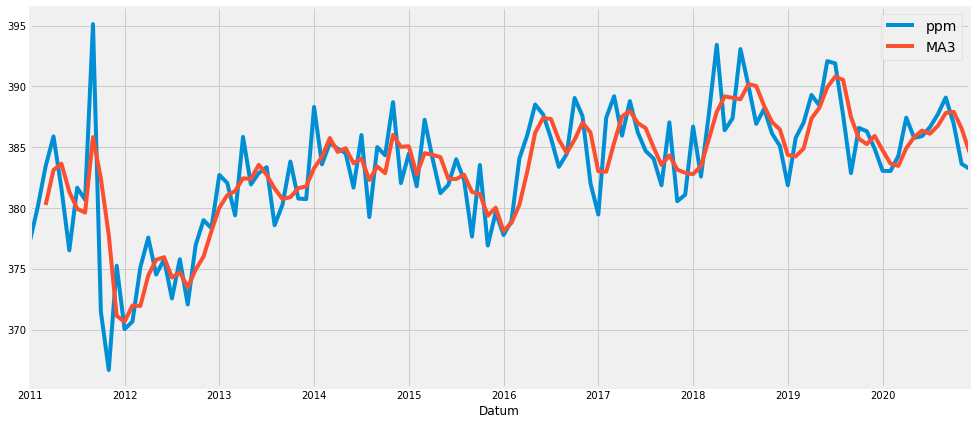

In [40]:
import matplotlib.pyplot as plt
import matplotlib.style as style

dfco2m['ppm'].plot(label = 'ppm', figsize=(15,7))
dfco2m['MA3'] = dfco2m['ppm'].rolling(3).mean()
dfco2m['MA3'].plot(label='MA3')
style.use('fivethirtyeight')
plt.legend()

# Streudiagramme

array([[<AxesSubplot:xlabel='Temperatur', ylabel='Temperatur'>,
        <AxesSubplot:xlabel='Luftdruck', ylabel='Temperatur'>,
        <AxesSubplot:xlabel='Kohlendioxid', ylabel='Temperatur'>,
        <AxesSubplot:xlabel='ppm', ylabel='Temperatur'>],
       [<AxesSubplot:xlabel='Temperatur', ylabel='Luftdruck'>,
        <AxesSubplot:xlabel='Luftdruck', ylabel='Luftdruck'>,
        <AxesSubplot:xlabel='Kohlendioxid', ylabel='Luftdruck'>,
        <AxesSubplot:xlabel='ppm', ylabel='Luftdruck'>],
       [<AxesSubplot:xlabel='Temperatur', ylabel='Kohlendioxid'>,
        <AxesSubplot:xlabel='Luftdruck', ylabel='Kohlendioxid'>,
        <AxesSubplot:xlabel='Kohlendioxid', ylabel='Kohlendioxid'>,
        <AxesSubplot:xlabel='ppm', ylabel='Kohlendioxid'>],
       [<AxesSubplot:xlabel='Temperatur', ylabel='ppm'>,
        <AxesSubplot:xlabel='Luftdruck', ylabel='ppm'>,
        <AxesSubplot:xlabel='Kohlendioxid', ylabel='ppm'>,
        <AxesSubplot:xlabel='ppm', ylabel='ppm'>]], dtype=object)

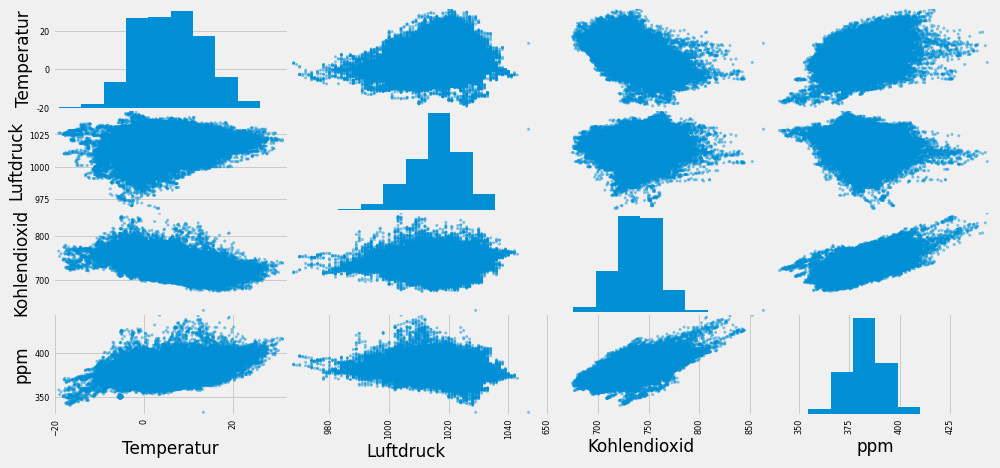

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
#df['logarithm'] = np.log(df['Temperatur']) 
#dfny = df.dropna()
#scatter_matrix(df['logarithm'])

#df.plot.scatter(df, loglog=True)
scatter_matrix(df_wasserkuppedrop, figsize=(15,7))


In [42]:
dfco2m = dfco2m.drop(columns = ['MA3'])
dfco2m

Temperatur    Luftdruck  Kohlendioxid         ppm
Datum                                                        
2011-01-31    9.861905  1018.083333    718.535714  377.267934
2011-02-28   10.933333  1015.166667    718.979167  380.087965
2011-03-31   10.738542  1012.093750    723.416667  383.434028
2011-04-30   10.977660  1008.351064    724.648936  385.891135
2011-05-31    8.386458  1008.500000    723.479167  381.627605
...                ...          ...           ...         ...
2020-08-31    5.670833  1020.233333    751.100000  387.711256
2020-09-30    7.174167  1014.941667    745.800000  389.088071
2020-10-31    5.693333  1009.225000    741.425000  386.948444
2020-11-30    2.715833  1012.291667    745.200000  383.644441
2020-12-31    2.384167  1013.800000    746.466667  383.237839

[120 rows x 4 columns]

array([[<AxesSubplot:xlabel='Temperatur', ylabel='Temperatur'>,
        <AxesSubplot:xlabel='Luftdruck', ylabel='Temperatur'>,
        <AxesSubplot:xlabel='Kohlendioxid', ylabel='Temperatur'>,
        <AxesSubplot:xlabel='ppm', ylabel='Temperatur'>],
       [<AxesSubplot:xlabel='Temperatur', ylabel='Luftdruck'>,
        <AxesSubplot:xlabel='Luftdruck', ylabel='Luftdruck'>,
        <AxesSubplot:xlabel='Kohlendioxid', ylabel='Luftdruck'>,
        <AxesSubplot:xlabel='ppm', ylabel='Luftdruck'>],
       [<AxesSubplot:xlabel='Temperatur', ylabel='Kohlendioxid'>,
        <AxesSubplot:xlabel='Luftdruck', ylabel='Kohlendioxid'>,
        <AxesSubplot:xlabel='Kohlendioxid', ylabel='Kohlendioxid'>,
        <AxesSubplot:xlabel='ppm', ylabel='Kohlendioxid'>],
       [<AxesSubplot:xlabel='Temperatur', ylabel='ppm'>,
        <AxesSubplot:xlabel='Luftdruck', ylabel='ppm'>,
        <AxesSubplot:xlabel='Kohlendioxid', ylabel='ppm'>,
        <AxesSubplot:xlabel='ppm', ylabel='ppm'>]], dtype=object)

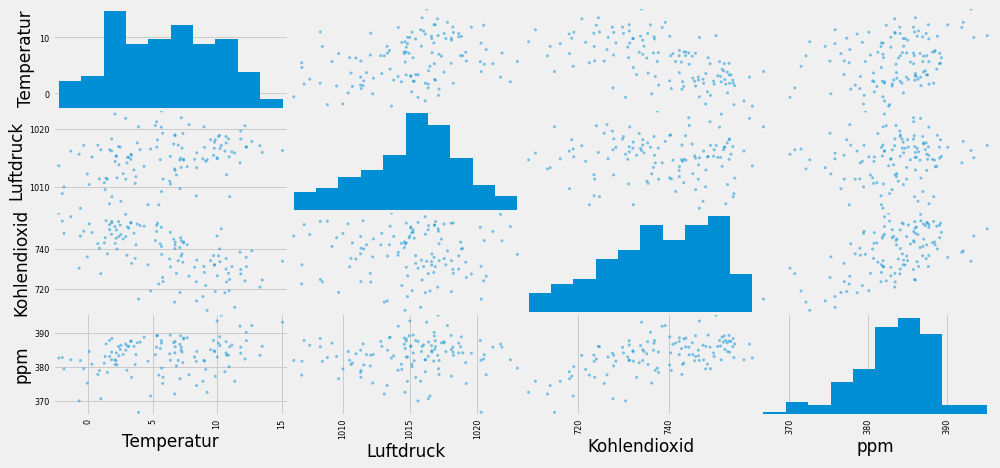

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
#df['logarithm'] = np.log(df['Temperatur']) 
#dfny = df.dropna()
#scatter_matrix(df['logarithm'])

#df.plot.scatter(df, loglog=True)

scatter_matrix(dfco2m , figsize=(15,7))


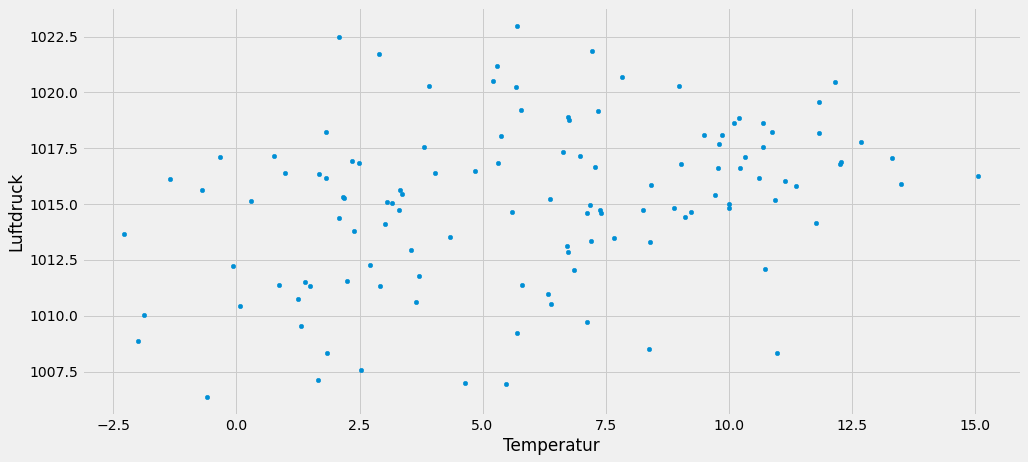

In [44]:
dfco2m.plot.scatter(x='Temperatur', y='Luftdruck', loglog=False, alpha=1, figsize=(15,7))
plt.show()

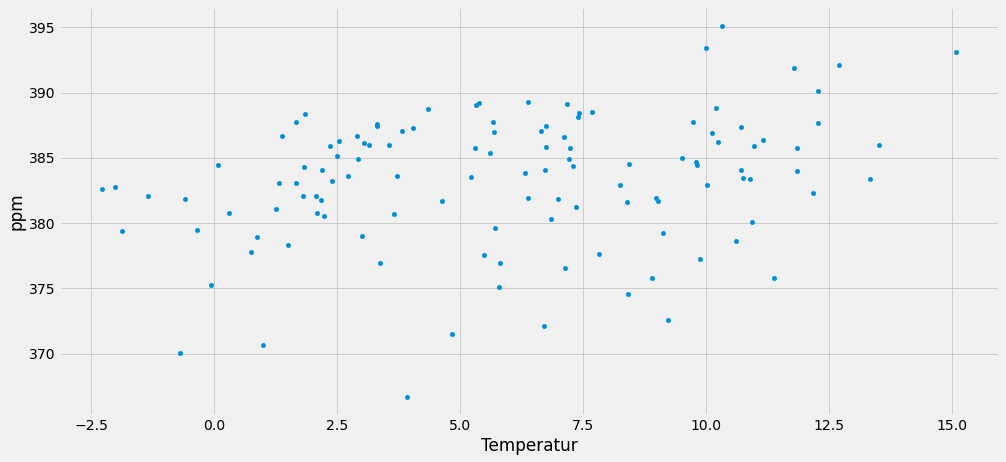

In [45]:
dfco2m.plot.scatter(x='Temperatur', y='ppm', loglog=False, alpha=1, figsize=(15,7))
plt.show()

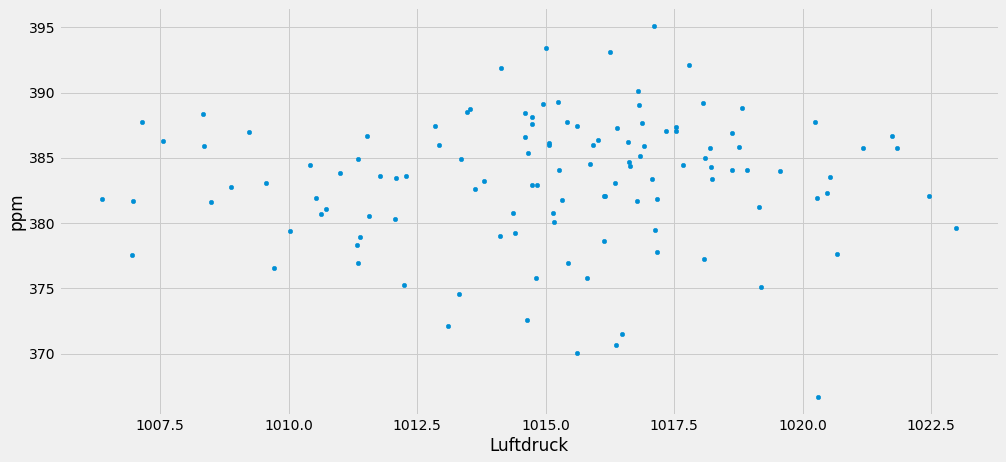

In [46]:
dfco2m.plot.scatter(x='Luftdruck', y='ppm', loglog=False, alpha=1, figsize=(15,7))
plt.show()

# 3D Streudiagramm



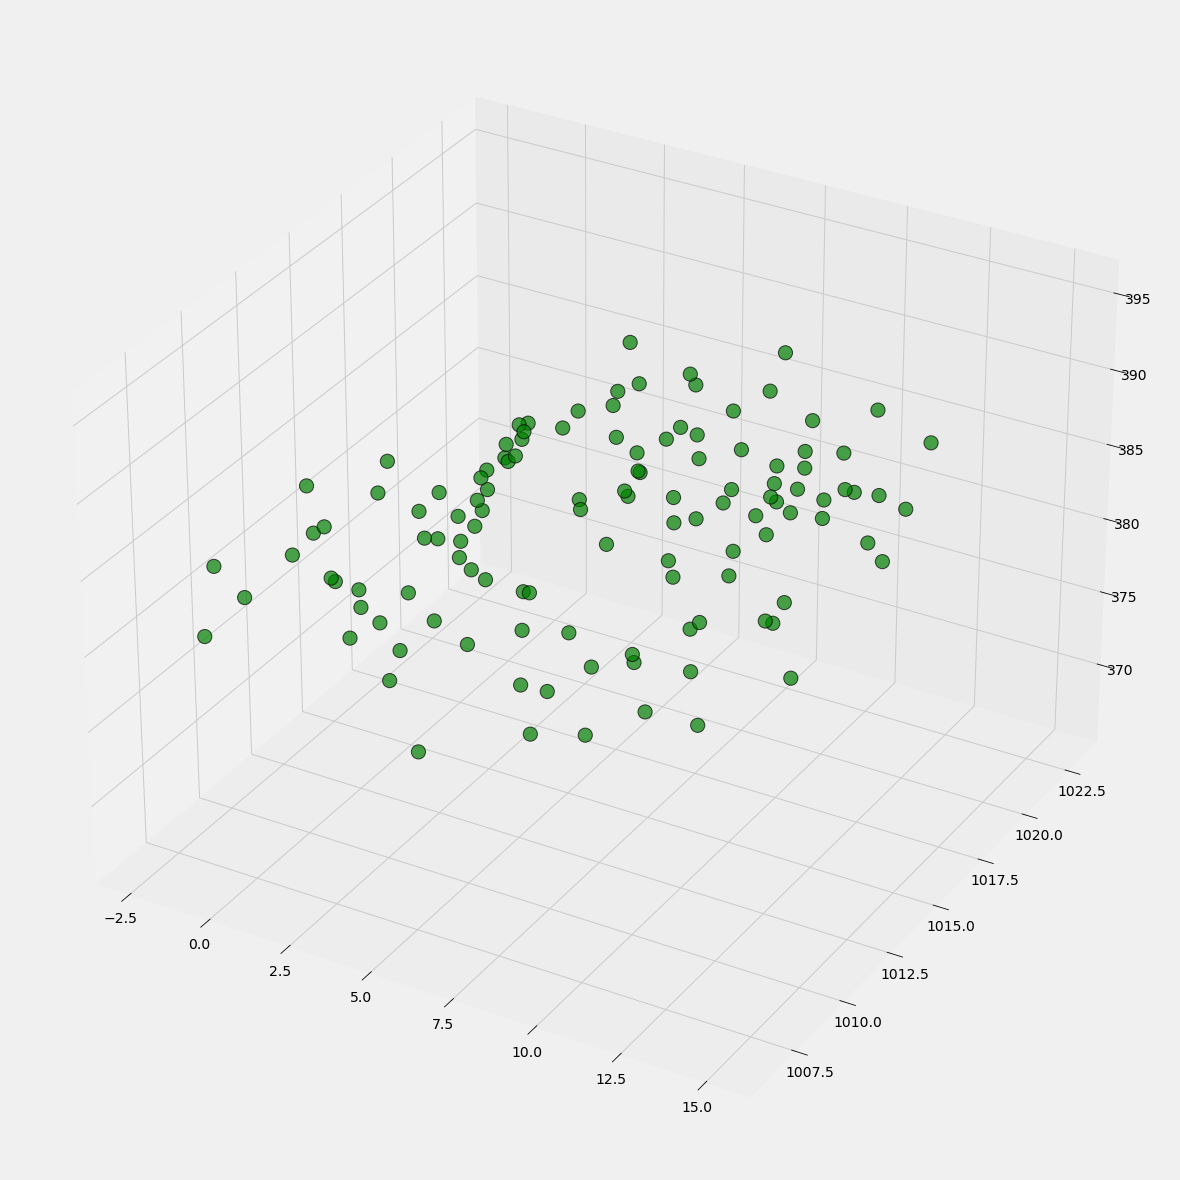

In [47]:
#https://stackoverflow.com/questions/59232073/scatter-plot-with-3-variables-in-matplotlib

#https://www.advsofteng.com/doc/cdpydoc/threedscatter2.htm Dropline



import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.array(dfco2m['Temperatur'])
y = np.array(dfco2m['Luftdruck'])
z = np.array(dfco2m['ppm'])

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, 
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c='green',
           )
plt.show()

In [58]:
dfco2m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2011-01-31 to 2020-12-31
Freq: M
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Temperatur    120 non-null    float64
 1   Luftdruck     120 non-null    float64
 2   Kohlendioxid  120 non-null    float64
 3   ppm           120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [63]:
x.shape

(120,)

In [64]:
y.shape

(120,)

In [65]:
z.shape

(120,)

ToDO: Droplines
https://matplotlib.org/devdocs/gallery/mplot3d/stem3d_demo.html    
Siehe: https://support.minitab.com/de-de/minitab/19/help-and-how-to/graphs/3d-scatterplot/interpret-the-results/key-results/

# Visualisierung der Kohlendioxidmessung 

In [4]:
import locale
locale.setlocale(locale.LC_ALL, 'de_DE')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
from calendar import month_abbr


df_vis = pd.read_csv('daten/wasserkuppe.csv')
df_vis.index = pd.to_datetime(df_vis.Datum)

df_vis

Datum  Temperatur  Luftdruck  Kohlendioxid
Datum                                                                   
2000-05-07 01:00:00  05-07-00 01:00         9.7        NaN           NaN
2000-05-07 02:00:00  05-07-00 02:00         9.8        NaN           NaN
2000-05-07 03:00:00  05-07-00 03:00         9.7        NaN           NaN
2000-05-07 04:00:00  05-07-00 04:00         9.4        NaN           NaN
2000-05-07 05:00:00  05-07-00 05:00         8.8        NaN           NaN
...                             ...         ...        ...           ...
2020-04-06 20:00:00  04-06-20 20:00         8.8      994.0         735.0
2020-04-06 21:00:00  04-06-20 21:00         8.8      995.0         737.0
2020-04-06 22:00:00  04-06-20 22:00         8.8      995.0         739.0
2020-04-06 23:00:00  04-06-20 23:00         7.6      995.0         740.0
2020-05-06 00:00:00  05-06-20 00:00         6.5      995.0         737.0

[174600 rows x 4 columns]

In [6]:
df_vis = df_vis.resample('M').mean()
df_vis

Temperatur    Luftdruck  Kohlendioxid
Datum                                            
2000-01-31    9.597414          NaN           NaN
2000-02-29    6.987156          NaN           NaN
2000-03-31    5.985321          NaN           NaN
2000-04-30    5.805000          NaN           NaN
2000-05-31    6.943972          NaN           NaN
...                ...          ...           ...
2020-08-31    5.670833  1020.233333    751.100000
2020-09-30    7.174167  1014.941667    745.800000
2020-10-31    5.693333  1009.225000    741.425000
2020-11-30    2.715833  1012.291667    745.200000
2020-12-31    2.384167  1013.800000    746.466667

[252 rows x 3 columns]

In [7]:
t = df_vis['Temperatur']
p = df_vis['Luftdruck']
mol = 44.01
mg2 = df_vis['Kohlendioxid']

df_vis['ppm'] = 10*mg2/mol*((8.31447*(t+273.15))/p)

df_vis

Temperatur    Luftdruck  Kohlendioxid         ppm
Datum                                                        
2000-01-31    9.597414          NaN           NaN         NaN
2000-02-29    6.987156          NaN           NaN         NaN
2000-03-31    5.985321          NaN           NaN         NaN
2000-04-30    5.805000          NaN           NaN         NaN
2000-05-31    6.943972          NaN           NaN         NaN
...                ...          ...           ...         ...
2020-08-31    5.670833  1020.233333    751.100000  387.798992
2020-09-30    7.174167  1014.941667    745.800000  389.157172
2020-10-31    5.693333  1009.225000    741.425000  387.010451
2020-11-30    2.715833  1012.291667    745.200000  383.661572
2020-12-31    2.384167  1013.800000    746.466667  383.280561

[252 rows x 4 columns]

In [8]:
df_vis = df_vis.drop(columns=['Temperatur','Luftdruck','Kohlendioxid'])
df_vis

ppm
Datum                 
2000-01-31         NaN
2000-02-29         NaN
2000-03-31         NaN
2000-04-30         NaN
2000-05-31         NaN
...                ...
2020-08-31  387.798992
2020-09-30  389.157172
2020-10-31  387.010451
2020-11-30  383.661572
2020-12-31  383.280561

[252 rows x 1 columns]

Folgender Code war bei der Erstellung hilfreich [^8]

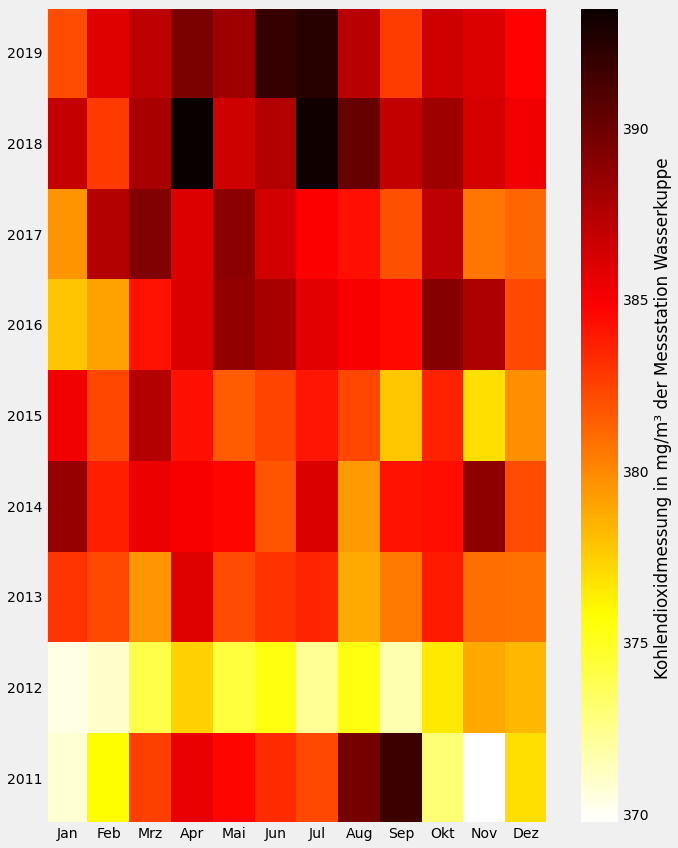

In [13]:
co2_data = df_vis['2011':'2019']
n_years = co2_data.index.year.max() - co2_data.index.year.min()
z = np.ones((n_years +1 , 12)) * np.min(co2_data.ppm)
for d, y in co2_data.groupby([co2_data.index.year, co2_data.index.month]):
  z[co2_data.index.year.max() - d[0], d[1] - 1] = y.mean()[0]

plt.figure(figsize=(10, 14))
plt.pcolor(np.flipud(z), cmap='hot_r')
plt.yticks(np.arange(0, n_years+1)+.5,
           range(co2_data.index.year.min(), co2_data.index.year.max()+1));
plt.xticks(np.arange(13)-.5, month_abbr)
plt.xlim((0, 12))
plt.colorbar().set_label('Kohlendioxidmessung in mg/m³ der Messstation Wasserkuppe ')
plt.show()  


In der Abbildung sind die Kohlendioxidwerte für November 2011 am geringsten und im April 2018 am höchsten. Der Einfluss der Nordhemisphäre dominiert den jährlichen Zyklus der Schwankung der Kohlenstoffdioxidkonzentration, denn dort befinden sich weit größere Landflächen und somit eine größere Biomasse als auf der Südhemisphäre. Die Konzentration ist im Mai auf der Nordhemisphäre am höchsten, da das im Frühling stattfindende Ergrünen zu dieser Zeit beginnt; sie erreicht ihr Minimum im Oktober, wenn die Photosynthese betreibende Biomasse am größten ist.[^5]

## Minimale und maximale Werte

Anschließend werden die maximalen und minimalen Werte aufgelistet. 

In [20]:
t = pd.to_datetime('11-11-30')
t

df_wasserkuppe_01_02_2002_12_0 = df_vis[(df_vis.index == '2011-11-30')]
df_wasserkuppe_01_02_2002_12_0

ppm
Datum                 
2011-11-30  369.717896

In [21]:
df_wasserkuppe_01_02_2002_12_0 = df_vis[(df_vis.index == '2018-07-31')]
df_wasserkuppe_01_02_2002_12_0

ppm
Datum                 
2018-07-31  393.254659

In [22]:
df_vis['ppm'].argmax()

219

In [24]:
df_vis.iloc[[df_vis['ppm'].argmax()]]

ppm
Datum                 
2018-04-30  393.527525

In [25]:
df_vis.iloc[[df_vis['ppm'].argmin()]]

ppm
Datum                 
2011-11-30  369.717896

## Wird fortgesetzt...

Quellenangaben:

[^1]: Webseite: https://www.hlnug.de/themen/luft/luftschadstoffe/kohlendioxid

[^2]: Jacobi, S. (o.D.). Grundlagen der Luftreinhaltung [Vorlesungsfolien]. Hessisches Landesamt für Naturschutz, Umwelt und Geologie Wiesbaden. https://www.hlnug.de/fileadmin/dokumente/luft/externe_fachveranstaltungen/vorlesungen/jacobi/02_Grundlagen_der_Luftreinhaltung.pdf . Abgerufen am 17. März 2021.

[^3]: Webseite: https://facebook.github.io/prophet/

[^4]: Hattenbach, J. (2012, 6. Dezember). Das neue Bild der Erde - bei Nacht. SciLogs - Wissenschaftsblogs. https://scilogs.spektrum.de/himmelslichter/das-neue-bild-der-erde-bei-nacht/

[^5]: U.K. (2016, 21. Januar). Florierende Vegetation verstärkt Kohlendioxid-Schwankungen. Max-Planck-Gesellschaft. https://www.mpg.de/9862783/co2-schwankung-vegetation-erderwaermung

[^6]: Kohlendioxid-Konzentration – Klimawandel. (2019). bildungsserver. https://wiki.bildungsserver.de/klimawandel/index.php/Kohlendioxid-Konzentration

[^7]: Wikipedia-Autoren. (2007, 16. Mai). Kohlenstoffdioxid in der Erdatmosphäre. Wikipedia. https://de.wikipedia.org/wiki/Kohlenstoffdioxid_in_der_Erdatmosph%C3%A4re

[^8]: Vettigli, G. (2019, 22. April). Visualizing Atmospheric Carbon Dioxide. Dzone.Com. https://dzone.com/articles/visualizing-atmospheric-carbon-dioxide

[^9]: Orduz, J. C. (2020, 7. Januar). Open Data: Germany Maps Viz. Dr. Juan Camilo Orduz. https://juanitorduz.github.io/germany_plots/

[^10]: ppm in mg/m3. (2019). NABU Eibelshausen. http://www.nabu-eibelshausen.de/Rechner/ppm.html

Quellenangaben Sonstiges:

https://stackoverflow.com/questions/51621615/which-geopandas-datasets-maps-are-available

https://github.com/geopandas/geopandas/blob/master/doc/source/gallery/plotting_basemap_background.ipynb

https://geopandas.org/gallery/plotting_basemap_background.html